# we can infer that the third cluster or cluster two have more members followed by cluster zero or first cluster and cluster one have the least number of members

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [2]:
data1 = pd.read_csv('crime_data.csv')

In [3]:
data1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Unnamed: 0    50 non-null object
Murder        50 non-null float64
Assault       50 non-null int64
UrbanPop      50 non-null int64
Rape          50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [5]:
data1.shape

(50, 5)

In [7]:
data1 = data1.rename({'Unnamed: 0':'unnamed'},axis = 1)

In [8]:
data1.head()

,unnamed,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
data2 = data1.drop(['unnamed'], axis = 1)

In [11]:
data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# Hierarchical

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
d_norm = norm_func(data2)

In [14]:
d_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


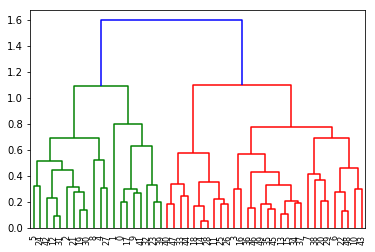

In [15]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(d_norm, method='complete'))

In [16]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [18]:
labels = hc.fit_predict(d_norm)

In [19]:
labels

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [25]:
data1['h_labels'] = labels

In [47]:
data1=data1.drop(['labels'],axis = 1)

In [48]:
data1

,unnamed,Murder,Assault,UrbanPop,Rape,h_labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [49]:
c = pd.DataFrame(data1.h_labels.value_counts().rename_axis('clusters').reset_index(name = 'members'))

In [50]:
c

,clusters,members
0,1,20
1,3,12
2,2,10
3,0,8


In [51]:
data1.h_labels.value_counts()

1    20
3    12
2    10
0     8
Name: h_labels, dtype: int64

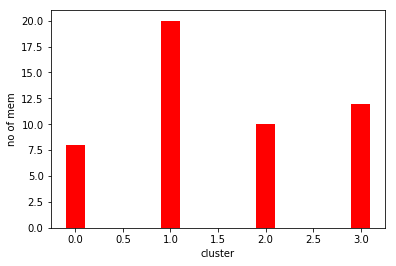

In [52]:
plt.bar(c.clusters,c.members,color = 'red', width = 0.2)
plt.xlabel('cluster')
plt.ylabel('no of mem')
plt.show()

In [61]:
data1.groupby('h_labels').agg(['mean']).reset_index()

,h_labels,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


In [62]:
#we can infer from this that cluster 1 have more members and cluster 0 have the least . and assault the crime having the highest average resulting in its frequent occurence


# KMEANS

In [63]:
from sklearn.cluster import KMeans

In [64]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(d_norm)
    iner.append(km.inertia_)

In [65]:
iner

[6.596893867946198,
 5.010878493006417,
 3.683456153585914,
 3.1850219324724334,
 2.838486634905374,
 2.555478124832634,
 2.370623390439918,
 2.2129347344552204]

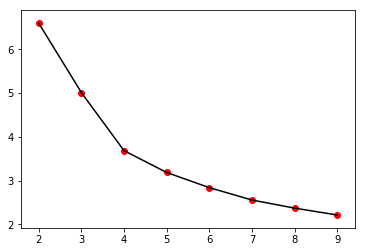

In [66]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [67]:
model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(d_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
model_kmeans.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [69]:
model_kmeans.inertia_

3.683456153585914

In [70]:
md=pd.Series(model_kmeans.labels_)

In [71]:
data1["k_labels"]=pd.Series(model_kmeans.labels_)

In [72]:
data1

,unnamed,Murder,Assault,UrbanPop,Rape,h_labels,k_labels
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,3
2,Arizona,8.1,294,80,31.0,3,3
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,3,3
5,Colorado,7.9,204,78,38.7,3,3
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,3,3
9,Georgia,17.4,211,60,25.8,0,1


In [73]:
c1 = pd.DataFrame(data1.k_labels.value_counts().rename_axis('clusters').reset_index(name = 'members'))

In [74]:
c1

,clusters,members
0,0,17
1,2,13
2,3,12
3,1,8


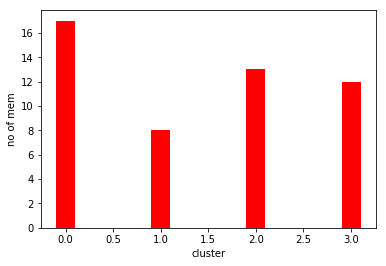

In [75]:
plt.bar(c1.clusters,c1.members,color = 'red', width = 0.2)
plt.xlabel('cluster')
plt.ylabel('no of mem')
plt.show()

In [76]:
data1.groupby('k_labels').agg(['mean']).reset_index()

,k_labels,Murder,Assault,UrbanPop,Rape,h_labels
,,mean,mean,mean,mean,mean
0,0,5.852941,141.176471,73.647059,19.335294,1.117647
1,1,13.937500,243.625000,53.750000,21.412500,0.125000
2,2,3.600000,78.538462,52.076923,12.176923,1.769231
3,3,10.966667,264.000000,76.500000,33.608333,2.750000


In [77]:
#we can infer from this that cluster 0 have more places and cluster 1 have the least . and assault is the crime having the highest average resulting in its frequent occurence

# DBSCAN

In [78]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [81]:
#DBSCAN

dbs=DBSCAN(min_samples=5,eps=0.3)
claas_pr=dbs.fit_predict(d_norm)

In [82]:
claas_pr

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [83]:
data1['db_labels'] = claas_pr

In [84]:
data1

,unnamed,Murder,Assault,UrbanPop,Rape,h_labels,k_labels,db_labels
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,0,3,-1
2,Arizona,8.1,294,80,31.0,3,3,-1
3,Arkansas,8.8,190,50,19.5,1,1,1
4,California,9.0,276,91,40.6,3,3,-1
5,Colorado,7.9,204,78,38.7,3,3,-1
6,Connecticut,3.3,110,77,11.1,1,0,1
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,3,3,-1
9,Georgia,17.4,211,60,25.8,0,1,0


In [85]:
g =pd.DataFrame(data1.db_labels.value_counts().rename_axis('cluster').reset_index(name ='members'))

In [86]:
g

,cluster,members
0,1,31
1,-1,14
2,0,5


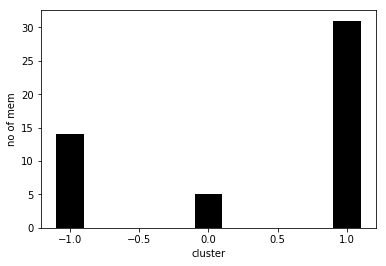

In [87]:
plt.bar(g.cluster,g.members,color = 'black', width = 0.2)
plt.xlabel('cluster')
plt.ylabel('no of mem')
plt.show()

In [89]:
data1.groupby('db_labels').agg(['mean']).reset_index()

,db_labels,Murder,Assault,UrbanPop,Rape,h_labels,k_labels
,,mean,mean,mean,mean,mean,mean
0,-1,10.992857,271.500000,71.357143,30.485714,2.214286,2.500000
1,0,14.720000,232.600000,58.200000,23.720000,0.000000,1.000000
2,1,5.222581,115.290323,64.096774,16.651613,1.451613,0.967742


In [90]:
#we can infer that cluster 1 have more cities and cluster 0 have the least but the urban population avg og cities in cluster -1 is large and the avg rate of crime is also high. 